In [91]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [92]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [93]:
import tensorflow as tf
import os

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

tf.config.list_physical_devices('GPU')



[]

In [94]:
import cv2
import imghdr

In [95]:
data_dir = 'data'

In [96]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [97]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image data/newtons/.ipynb_checkpoints
Image not in ext list data/newtons/newton09 (cópia).jpg
Image not in ext list data/newtons/newton09 (outra cópia).jpg
Image not in ext list data/newtons/newton09.jpg
Image not in ext list data/newtons/newton09 (3ª cópia).jpg
Image not in ext list data/einteins/einstein03 (outra cópia).jpg
Image not in ext list data/einteins/einstein03.jpg
Image not in ext list data/einteins/einstein03 (3ª cópia).jpg
Image not in ext list data/einteins/einstein03 (cópia).jpg


In [98]:
import numpy as np
from matplotlib import pyplot as plt

In [99]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 332 files belonging to 2 classes.


In [100]:
data_iterator = data.as_numpy_iterator()

In [101]:
batch = data_iterator.next()

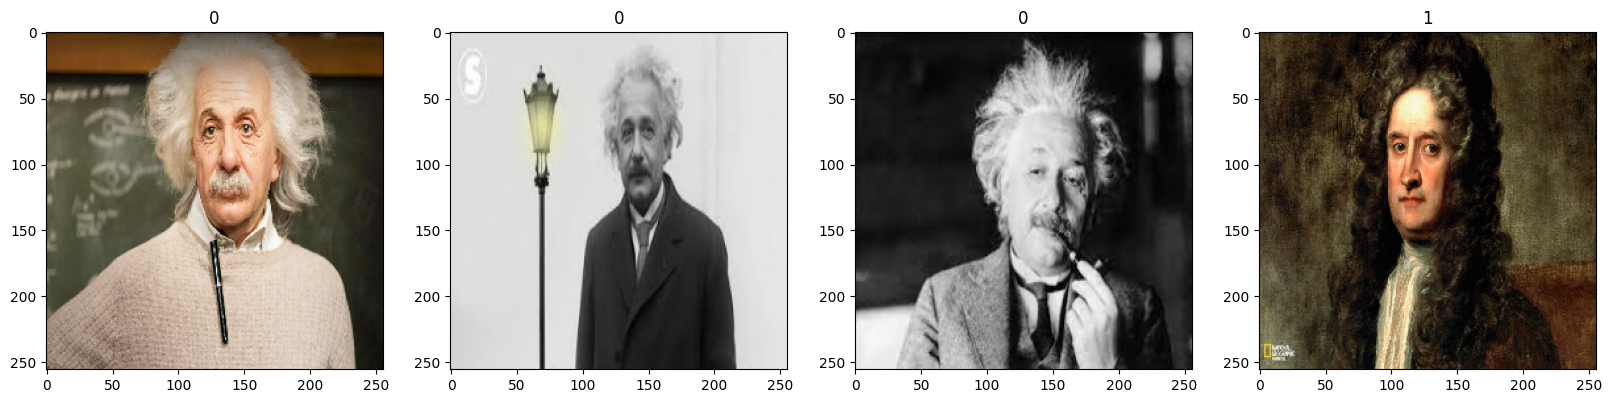

In [102]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [103]:
data = data.map(lambda x,y: (x/255, y))

In [104]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.00163143, 0.00163143, 0.00163143],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.00163143, 0.00163143, 0.00163143],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.00136059, 0.00136059, 0.00136059],
          [0.00327053, 0.00327053, 0.00327053]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [105]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [106]:
train_size

7

In [107]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [108]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [110]:
model = Sequential()

In [111]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [112]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [113]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 30, 30, 16)       

In [114]:
logdir='logs'

In [115]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [116]:
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/25
7/7 [==============================] - 28s 4s/step - loss: 0.7162 - accuracy: 0.5536 - val_loss: 0.6398 - val_accuracy: 0.6094
Epoch 2/25
7/7 [==============================] - 23s 3s/step - loss: 0.5868 - accuracy: 0.7857 - val_loss: 0.4830 - val_accuracy: 0.8281
Epoch 3/25
7/7 [==============================] - 16s 2s/step - loss: 0.4533 - accuracy: 0.7768 - val_loss: 0.3722 - val_accuracy: 0.8750
Epoch 4/25
7/7 [==============================] - 16s 2s/step - loss: 0.2831 - accuracy: 0.8929 - val_loss: 0.1932 - val_accuracy: 0.9375
Epoch 5/25
7/7 [==============================] - 15s 2s/step - loss: 0.1784 - accuracy: 0.9464 - val_loss: 0.2170 - val_accuracy: 0.9375
Epoch 6/25
7/7 [==============================] - 16s 2s/step - loss: 0.1242 - accuracy: 0.9821 - val_loss: 0.0841 - val_accuracy: 0.9844
Epoch 7/25
7/7 [==============================] - 16s 2s/step - loss: 0.0652 - accuracy: 0.9688 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 8/25
7/7 [==================

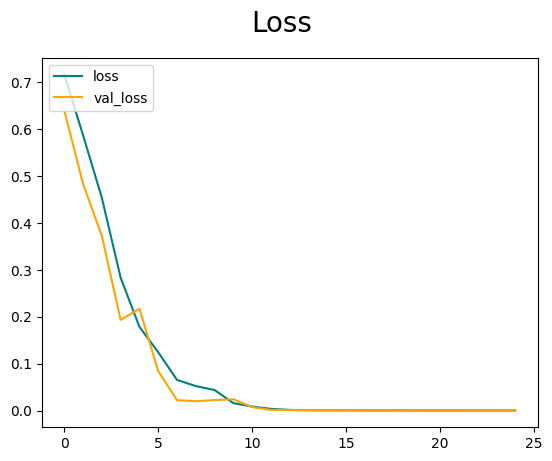

In [117]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

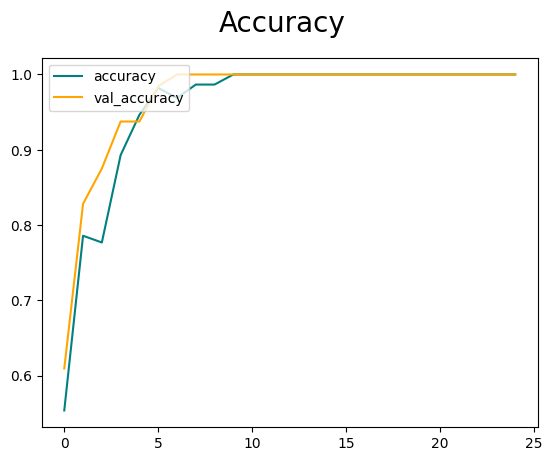

In [118]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [119]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [120]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [121]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 521ms/step


In [122]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [123]:
import cv2

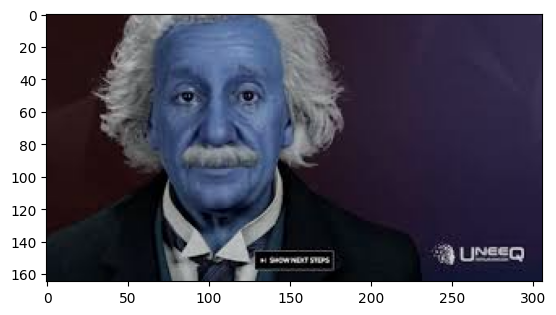

In [127]:
img = cv2.imread('images.jpeg')
plt.imshow(img)
plt.show()

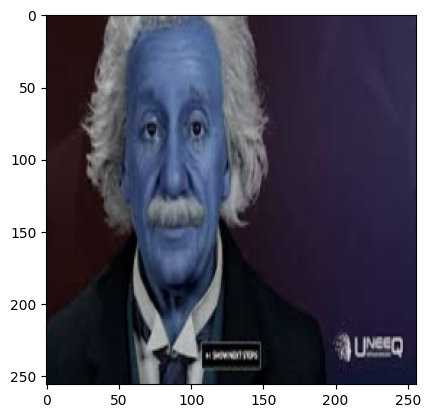

In [128]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [129]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 152ms/step


In [130]:
yhat

array([[3.4019726e-05]], dtype=float32)

In [131]:
if yhat > 0.5:
    print(f'é o newton')
else:
    print(f'é o einstein')

é o einstein


### Pré-requisitos

Certifique-se de ter o ambiente adequado configurado com as bibliotecas necessárias instaladas.

Adição do Arquivo de Dados

Para garantir que o código funcione corretamente, é essencial adicionar um arquivo data contendo as imagens necessárias. Este é um passo crucial para garantir que o código execute sem problemas.

    Criando a pasta data: Certifique-se de criar uma pasta chamada data na raiz do projeto.

    Adicionando as Imagens: Coloque todas as imagens necessárias dentro da pasta data. Certifique-se de que as imagens estejam nomeadas corretamente e sigam as especificações exigidas pelo código.
